### setup

In [172]:
!pwd

/Users/quolc/pathology/deep/chainer-examples/mnist-stacked-autoencoder


In [18]:
%matplotlib inline
import importlib
import numpy as np

import chainer
from chainer import serializers

import data
import net
importlib.reload(net)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors

In [19]:
# load dataset
mnist = data.load_mnist_data()
mnist['data'] = mnist['data'].astype(np.float32)
mnist['data'] /= 255

N = data.num_train
x_train, x_test = np.split(mnist['data'], [N])
label_train, label_test = np.split(mnist['target'], [N])

In [150]:
# network setup
ae1 = net.AutoEncoder(784, 1000, 'sigmoid', tied=False)
ae2 = net.AutoEncoder(1000, 500, 'sigmoid', tied=False)
ae3 = net.AutoEncoder(500, 250, 'sigmoid', tied=False)
ae4 = net.AutoEncoder(250, 2, 'identity', tied=False)
model = net.Regression(net.StackedAutoEncoder([ae1, ae2, ae3, ae4]))
serializers.load_npz('sae_sigmoid-1000-500-250-2-untied_adam0.0001_p1000-f1000_201608051428.model', model)

### encoding

In [151]:
# encode data
plots = {}
for i in range(10):
    tmp = chainer.Variable(np.asarray(x_train[label_train == i][:1000]))
    plots[i] = model.predictor.encode(tmp).data

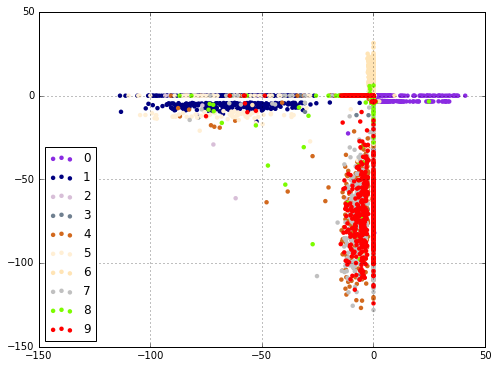

In [152]:
%matplotlib inline
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1,1,1)

for i in range(10):
    x = plots[i][:,0]
    y = plots[i][:,1]

    ax.scatter(x, y, c=list(colors.cnames)[i*2], label=str(i), edgecolors='None')

ax.grid(True)
ax.legend(loc='lower left')

In [139]:
fig.savefig('output.png')